In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Working with each dataset -    
## Data Preprocessing 
### 1] Ravdess Dataframe :

Eg. of filename : 

02-01-06-01-02-01-12.mp4

In [3]:
import warnings 
import sys
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings('ignore' , category=DeprecationWarning)


Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
ravdess_df.Emotion.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'}, inplace=True)
ravdess_df.head()

,Emotion,Path
0,Surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,Neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,Disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,Disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,Neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


### 2. CREMA DataFrame
### Example file format : 

1001_DFA_ANG_XX.wav

In [4]:
import os
import pandas as pd
Crema = "/kaggle/input/cremad/AudioWAV/"
crema_directoryList = os.listdir(Crema)

# creating empty lists for emotion and paths of the file.
file_emotion = []
file_path = []

for file in crema_directoryList:
    # splitting the file to extract what we need
        file_path.append(Crema + file)
        part = file.split('_')
        
        # logic 
        if part[2] == 'ANG':
            file_emotion.append('Angry')
        elif part[2] == 'DIS':
            file_emotion.append("Disgust")
        elif part[2] == 'FEA':
            file_emotion.append("Fear")
        elif part[2] == 'HAP':
            file_emotion.append('Happy')
        elif part[2] == 'NEU':
            file_emotion.append('Neutral')
        else:
            file_emotion.append('Unknown')
            
# creating the dataframe 
emotion_df = pd.DataFrame(data = file_emotion , columns = ['Emotion'])
path_df = pd.DataFrame(data = file_path , columns = ['Path'])

crema_df = pd.concat([emotion_df , path_df] , axis = 1 ) # concatenate along the columns - axis = 1

crema_df.head(10)


,Emotion,Path
0,Disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,Happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,Happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,Disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,Disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
5,Disgust,/kaggle/input/cremad/AudioWAV/1027_DFA_DIS_XX.wav
6,Happy,/kaggle/input/cremad/AudioWAV/1032_IEO_HAP_HI.wav
7,Unknown,/kaggle/input/cremad/AudioWAV/1023_TIE_SAD_XX.wav
8,Disgust,/kaggle/input/cremad/AudioWAV/1041_TAI_DIS_XX.wav
9,Unknown,/kaggle/input/cremad/AudioWAV/1004_WSI_SAD_XX.wav


## 3. Savee Dataframe 
#### Example File format :

DC_a01.wav


The prefix after the "_" explains the emotion :

"a" : angry 

"d" : disgust 

"f" : fear 

"h" : happy

"n" : neutral 

"sa": sad 

"su": surprise




In [5]:
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
savee_directoryList = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directoryList :
    file_path.append(Savee + file)
    
    part = file.split('_')[1]
    emo = part[:-6] # peeche se last 6 characters hata do as last character is -6 
    
    # logic
    if emo == 'a':
        file_emotion.append('Angry')
    elif emo == 'd':
        file_emotion.append('Disgust')
    elif emo == 'h':
        file_emotion.append('Happy')
    elif emo == 'sa':
        file_emotion.append('Sad')
    elif emo == 'su':
        file_emotion.append('Surprise')
    elif emo == 'n':
        file_emotion.append('Neutral')
    elif emo == 'f':
        file_emotion.append('Fear')
    else :
        file_emotion.append('Unknown')

# creating the dataframe 
emotion_df = pd.DataFrame(data = file_emotion , columns = ['Emotion'])
path_df = pd.DataFrame(data = file_path , columns = ['Path'])

savee_df = pd.concat([emotion_df,path_df] , axis = 1 )
savee_df.head(10)
    
    
    

,Emotion,Path
0,Happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,Fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,Happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,Disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,Angry,/kaggle/input/surrey-audiovisual-expressed-emo...
5,Fear,/kaggle/input/surrey-audiovisual-expressed-emo...
6,Happy,/kaggle/input/surrey-audiovisual-expressed-emo...
7,Surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
8,Angry,/kaggle/input/surrey-audiovisual-expressed-emo...
9,Neutral,/kaggle/input/surrey-audiovisual-expressed-emo...


### 4. TESS Dataframe 

#### Example of file format 

OAF_back_fear.wav

OAF_back_sad.wav

In [6]:
import os
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
tess_directoryList = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directoryList:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        # the only oddly named parameter
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess,dir,file))

# creating the dataframes 
path_df = pd.DataFrame(data = file_path , columns = ['Path'])
emotion_df = pd.DataFrame(data = file_emotion , columns = ['Emotion'])

#capitalising the first letter of the emotion to match other datasets
emotion_df['Emotion'] = emotion_df['Emotion'].str.capitalize()

tess_df = pd.concat([emotion_df , path_df] , axis = 1)
tess_df.head(10)

,Emotion,Path
0,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
5,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
6,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
7,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
8,Fear,/kaggle/input/toronto-emotional-speech-set-tes...
9,Fear,/kaggle/input/toronto-emotional-speech-set-tes...


Creating the final dataframe using all the 4 dataframes.

In [7]:
final_df = pd.concat([ravdess_df , savee_df , crema_df , tess_df] , axis = 0 )
# combining along the rows - axis = 0

#converting into csv
final_df.to_csv("final_df.csv" , index = False)

final_df.head(10)


,Emotion,Path
0,Surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,Neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,Disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,Disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,Neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
5,Fear,/kaggle/input/ravdess-emotional-speech-audio/a...
6,Sad,/kaggle/input/ravdess-emotional-speech-audio/a...
7,Neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
8,Calm,/kaggle/input/ravdess-emotional-speech-audio/a...
9,Happy,/kaggle/input/ravdess-emotional-speech-audio/a...


### EDA - Data Visualisation and Exploration

Understanding the count of each emotion in our dataset to realise the uniformity of the categories.


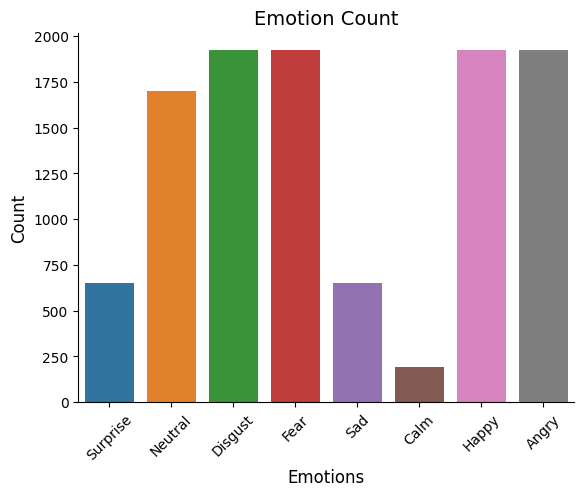

In [8]:
plt.title('Emotion Count', size = 14)
filtered_final_df = final_df[final_df['Emotion']!='Unknown']

sns.countplot(data = filtered_final_df , x = 'Emotion') # y will be automatically count
plt.xlabel('Emotions',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
plt.xticks(rotation = 45)

plt.show()


### Waveplot and Spectograms 
#### Waveplot

To analyse the loudness ( intensity ) of the audio at a given time. 

#### Spectogram 

To analyse the frequency ( pitch ) of the sound with respect to time using in a linear manner ( additional ).

#### Mel Spectogram 

To analyse the frequency ( pitch ) of the given audio with respect to time in a non-linear manner ( similar to human auditory perception ) - logarithmic ( multiplicative - exponential ).



In [14]:
# creating functions to display the plots 

def waveplot_creation(data , sr , emotion):
    plt.figure(figsize = (10,4))
    plt.title(f"{emotion} Waveplot")
    
    librosa.display.waveshow(data , sr = sr)
    
    

def spectrogram_creation(data , sr , emotion):
    plt.figure(figsize=(12,3))
    plt.title(f"{emotion} Spectogram")
    
   
    S = librosa.stft(data) # short-time fourier transform
    Sdb = librosa.amplitude_to_db(S)
    
    librosa.display.specshow(Sdb , sr = sr ,  x_axis ='time' , y_axis = 'hz' )
    plt.colorbar()
    plt.tight_layout()

def melspectrogram_creation(data , sr , emotion):
    plt.figure(figsize=(12,3))
    plt.title(f"{emotion} Mel Spectrogram")
    
    MS = librosa.feature.melspectrogram(y = data , sr=sr)
    MSdb = librosa.power_to_db(MS)
    
    librosa.display.specshow(MSdb , sr = sr , x_axis ='time' , y_axis = 'mel' , cmap = 'viridis')
    plt.colorbar()
    plt.tight_layout()
    
    


#### Creating the visualisations for emotions :

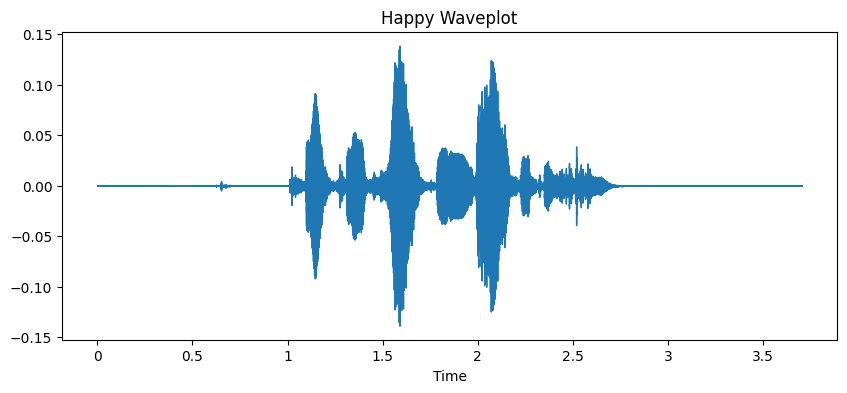

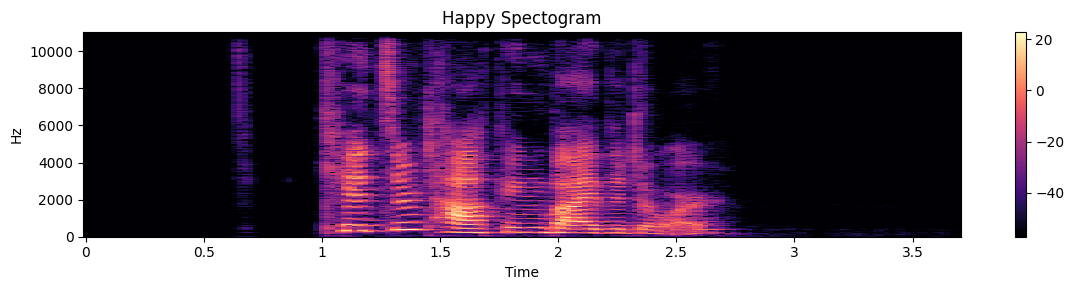

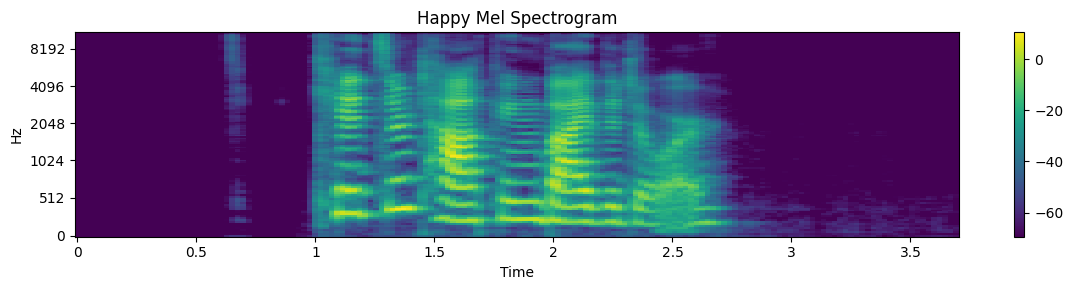

In [15]:
emotion = 'Happy'

path = np.array(final_df.Path[final_df.Emotion == emotion])[1] # removing the headers at [0]
data , sampling_rate = librosa.load(path)

#invocation
waveplot_creation(data , sampling_rate , emotion)
spectrogram_creation(data , sampling_rate , emotion)
melspectrogram_creation(data , sampling_rate , emotion)

Audio(path)


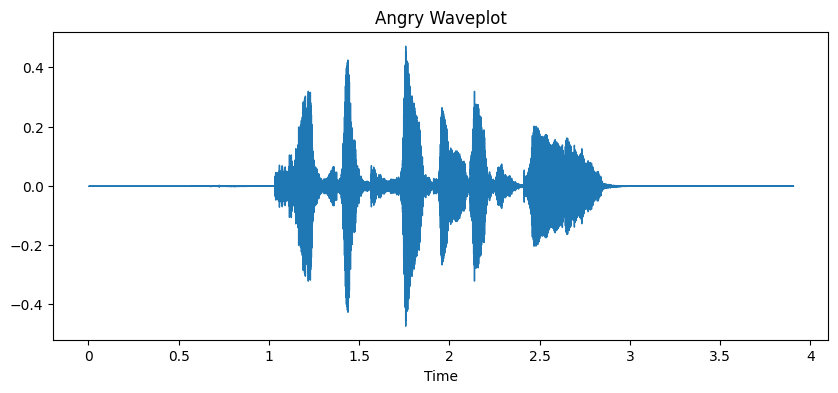

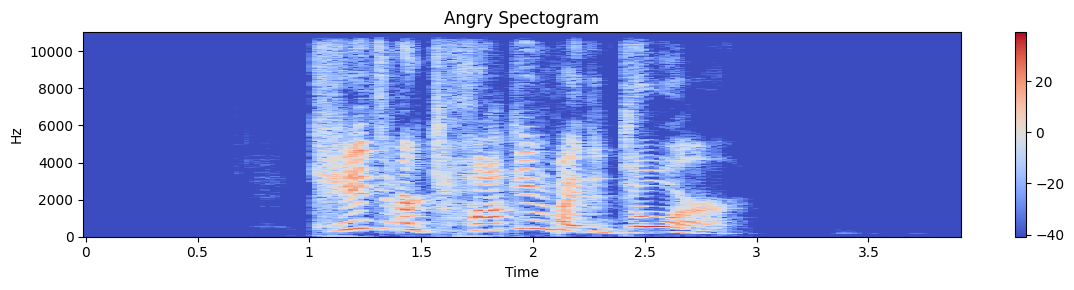

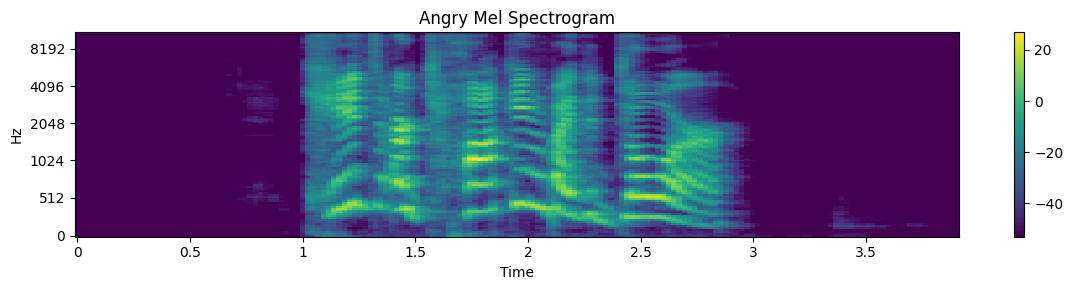

In [16]:
emotion = 'Angry'
path = np.array(final_df.Path[final_df.Emotion == emotion])[1]

data , sampling_rate = librosa.load(path)

waveplot_creation(data , sampling_rate , emotion )
spectrogram_creation(data , sampling_rate , emotion )
melspectrogram_creation(data , sampling_rate , emotion )

Audio(path)



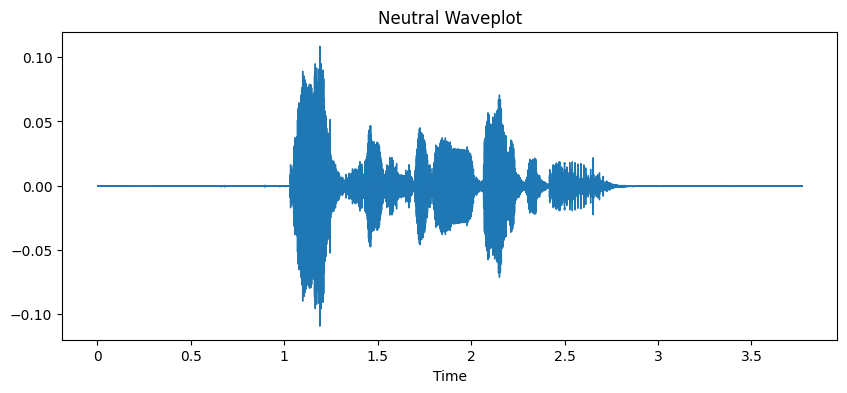

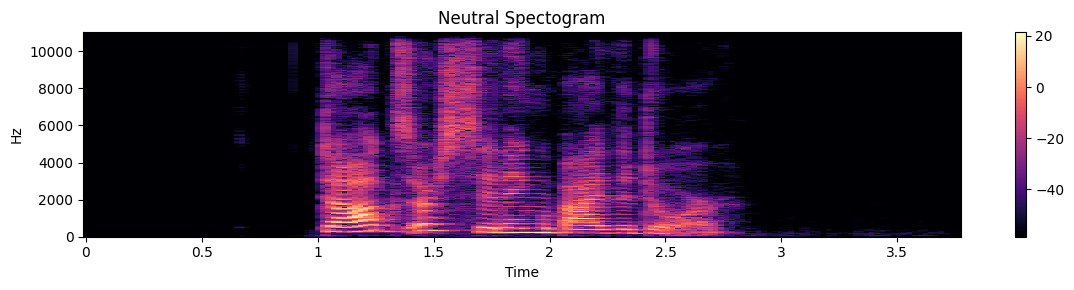

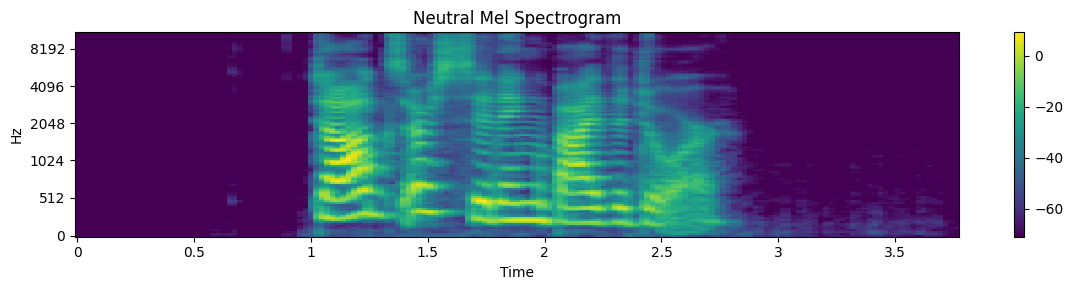

In [17]:
emotion = 'Neutral'
path = np.array(final_df.Path[final_df.Emotion == emotion])[1]

data , sampling_rate = librosa.load(path)

waveplot_creation(data, sampling_rate, emotion)
spectrogram_creation(data , sampling_rate , emotion)
melspectrogram_creation(data , sampling_rate , emotion)

Audio(path)

### Data Augmentation -- Level up!

We will be using temporal distortions as our data augmentation technique :

1. Noise injection

2. Time Stretching

3. Shifting

4. Pitch

In [19]:
# augmentation techniques 

# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data 
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching 
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
    
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)

# sample - arbitrarily chosen
path = np.array(final_df.Path)[1] 
data , sampling_rate = librosa.load(path)


SAMPLE AUDIO

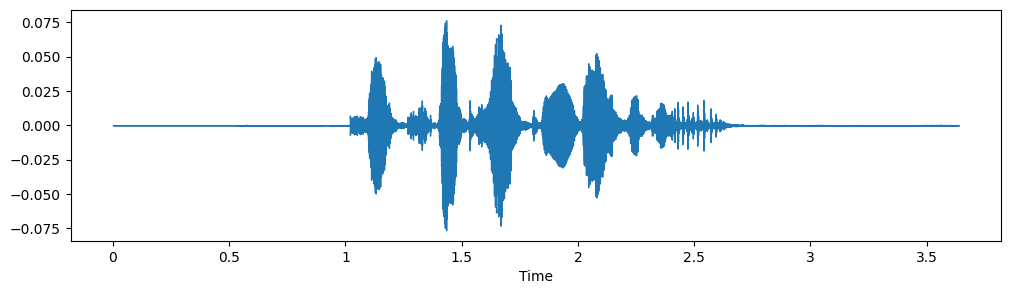

In [20]:
plt.figure(figsize = (12,3))
librosa.display.waveshow(y=data , sr = sampling_rate)

Audio(path)

NOISE INJECTION

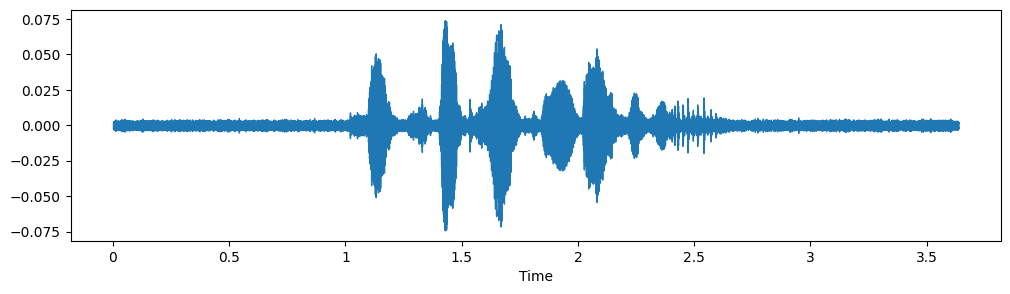

In [21]:
n = noise(data) # noise injected data
plt.figure(figsize=(12,3))
librosa.display.waveshow(y=n , sr = sampling_rate)
Audio(n , rate = sampling_rate)

TIME STRETCHING

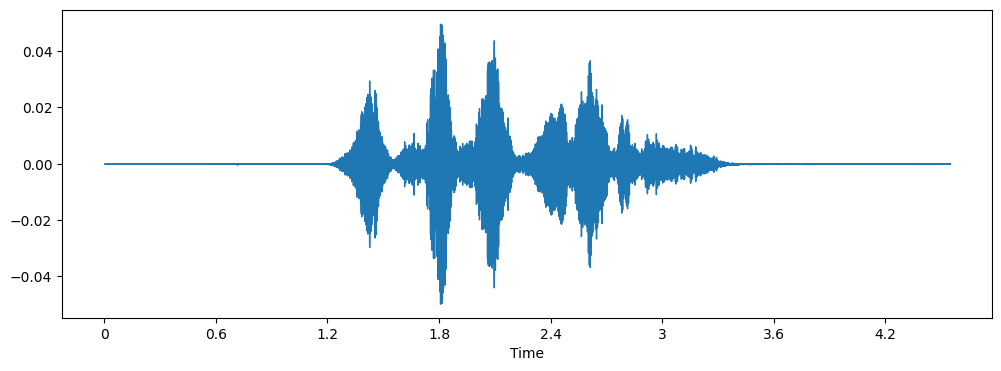

In [22]:
t_s = librosa.effects.time_stretch(data , rate = 0.8)


plt.figure(figsize=(12, 4))

librosa.display.waveshow(y=t_s, sr=sampling_rate)

Audio(t_s, rate=sampling_rate)

TIME SHIFTING


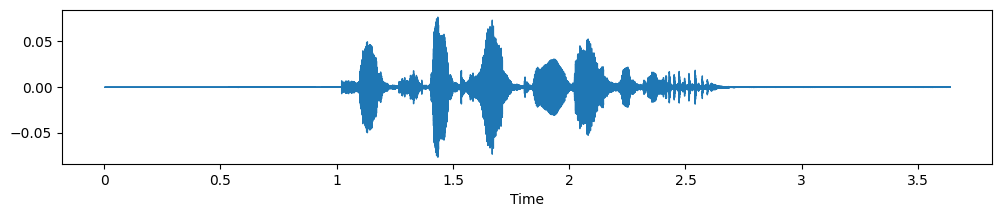

In [23]:
t_sh = time_shift(data)
plt.figure(figsize=(12,2))
librosa.display.waveshow(data , sr = sampling_rate)

Audio(t_sh , rate = sampling_rate)

PITCH SHIFTING

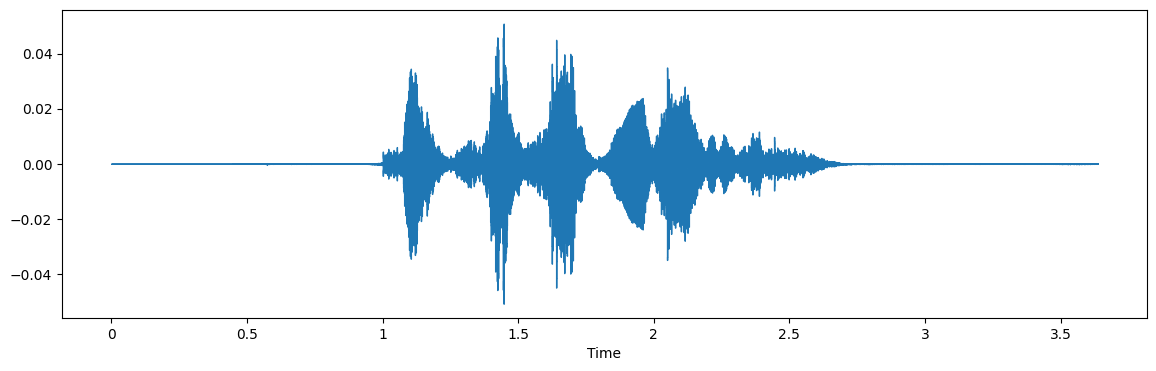

In [24]:
p = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=p, sr=sampling_rate)
Audio(p, rate=sampling_rate)

### Feature Extraction
#### Features extracted in this project :
1. ZCR ( Zero Crossing Rate )

2. Chroma Vector 

3. MFCC ( Mel-frequency cepstral coefficient )

4. RMS ( Root mean square )

5. Mel Spectrogram for training.

In [25]:
def extract_features(data):
    result = np.array([])
    
    # ZCR 
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T , axis = 0) # mean of zcr 
    result = np.hstack((result , zcr)) # horizontal stack
    
    # chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_STFT = np.mean(librosa.feature.chroma_stft(S=stft,sr=sampling_rate).T , axis = 0)
    result = np.hstack((result,chroma_STFT))
    
    #MFCC
    MFCC = np.mean(librosa.feature.mfcc(y = data , sr= sampling_rate).T , axis =0)
    result = np.hstack((result,MFCC))
    
    #MELSPECTROGRAM 
    
    mel_spec = np.mean(librosa.feature.melspectrogram(y=data,sr=sampling_rate).T ,axis = 0 )
    result = np.hstack((result,mel_spec))
    
    return result

def get_features(path):
    data , sampling_rate  = librosa.load(path, duration = 2.5 ,offset = 0.6) 
    # duration - the duration of audio loaded (sec)
    # offset - from where the loading starts - load starts at 0.6 sec of the audio.
    # this is done to handle the silence during start and end of the audio.
    
    # original data 
    r1 = extract_features(data)
    result = np.array(r1)
    
    # augmented data 
    noise_data = noise(data)
    r2 = extract_features(noise_data)
    result = np.array(r2)
    
    stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    r3 = extract_features(stretched_pitch_data)
    result = np.vstack((result,r3))
    
    return result
    

In [ ]:
%%time
X , Y = [] , []
for path , emotion in zip(final_df.Path , final_df.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)                  

In [ ]:
len(X), len(Y) , final_df.Path.shape

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

These are the featires for each audio files and have been saved.

### Data Preparation
##### Normalization and Splitting of Data


In [ ]:
X = Features.iloc[: ,:-1].values 
Y = Features['labels'].values


In [ ]:
# one hot encoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

Y

In [ ]:
# splitting the data
x_train , x_test , y_train , y_test = train_test_split(X,Y,random_state=0 , shuffle = True)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

In [ ]:
# scaling using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

In [ ]:
# making the data model compatible 
x_train = np.expand_dims(x_train , axis = 2)
x_test = np.expand_dims(x_test , axis = 2)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

## The Model - CNN

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(Conv1D(256 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))


model.add(Conv1D(256 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 20%

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.3)) # 30%

model.add(Dense(9 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])


model.summary()

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor = 0.4 , verbose=0 , patience = 2 , min_lr=0.0000001)
history = model.fit(x_train , y_train , batch_size = 64 , epochs = 50 , validation_data =(x_test,y_test), callbacks=[rlrp])


In [ ]:

print("Accuracy of the model on the test data : " , model.evaluate(x_test,y_test)[1]*100,'%')


In [ ]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

In [ ]:
# PREDICTING ON TEST DATA
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

#### Predictions

In [ ]:
# PREDICTIONS 
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])
pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(15)


In [ ]:
# confusion matrix 
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

An overall accuracy of :  57 % 